In [1]:
import pandas as pd #importing pandaslibrary
import matplotlib.pyplot as plt #importing matplotlib library
import seaborn as sns #importing Seaborn
import numpy as np #importing numpy
import statsmodels.formula.api as smf #importing statsmodels
pd.set_option('display.max_columns', None)

In [2]:
health = pd.read_csv("Health.csv", na_values = "-") #import health and assign variable
health.head() #checking if data loaded correctly

,Continent,Country,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Europe,Netherlands,Amsterdam,1,1858.0,£1.92,20.40%,81.2,30.93,1434.0,7.44,422,1048,£34.90
1,Oceania,Australia,Sydney,2,2636.0,£1.48,29.00%,82.1,26.86,1712.0,7.22,406,1103,£41.66
2,Europe,Austria,Vienna,3,1884.0,£1.94,20.10%,81.0,17.33,1501.0,7.29,132,1008,£25.74
3,Europe,Sweden,Stockholm,4,1821.0,£1.72,20.60%,81.8,19.63,1452.0,7.35,129,598,£37.31
4,Europe,Denmark,Copenhagen,5,1630.0,£2.19,19.70%,79.8,21.24,1380.0,7.64,154,523,£32.53


In [3]:
health = health.dropna() # Dropping all N/A record 
health = health.reset_index(drop = True) # Resetting index 
health.head(20) # Checking Dataframe

,Continent,Country,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Europe,Netherlands,Amsterdam,1,1858.0,£1.92,20.40%,81.2,30.93,1434.0,7.44,422,1048,£34.90
1,Oceania,Australia,Sydney,2,2636.0,£1.48,29.00%,82.1,26.86,1712.0,7.22,406,1103,£41.66
2,Europe,Austria,Vienna,3,1884.0,£1.94,20.10%,81.0,17.33,1501.0,7.29,132,1008,£25.74
3,Europe,Sweden,Stockholm,4,1821.0,£1.72,20.60%,81.8,19.63,1452.0,7.35,129,598,£37.31
4,Europe,Denmark,Copenhagen,5,1630.0,£2.19,19.70%,79.8,21.24,1380.0,7.64,154,523,£32.53
5,Europe,Finland,Helsinki,6,1662.0,£1.60,22.20%,80.4,13.08,1540.0,7.80,113,309,£35.23
6,Europe,Germany,Berlin,8,1626.0,£1.55,22.30%,80.6,39.41,1386.0,7.07,254,1729,£26.11
7,Europe,Spain,Barcelona,9,2591.0,£1.19,23.80%,82.2,65.19,1686.0,6.40,585,2344,£37.80
8,North America,Canada,Vancouver,10,1938.0,£1.08,29.40%,81.7,24.26,1670.0,7.23,218,788,£31.04
9,Oceania,Australia,Melbourne,11,2363.0,£1.57,29.00%,82.1,25.90,1712.0,7.22,243,813,£36.89


In [4]:
health.rename(columns = {"Outdoor activities(City)": "# of Outdoor Activities(City)","Sunshine hours(City)":"Annual Sunshine Hours(City)" ,"Cost of a bottle of water(City)":"Water Bottle Cost(City)","Number of take out places(City)":"# of Take Out Places","Cost of a monthly gym membership(City)":"Monthly Gym Membership Cost(City)"}, inplace = True) # Renaming columns
health.head() #Checking Dataframe

,Continent,Country,City,Rank,Annual Sunshine Hours(City),Water Bottle Cost(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),# of Outdoor Activities(City),# of Take Out Places,Monthly Gym Membership Cost(City)
0,Europe,Netherlands,Amsterdam,1,1858.0,£1.92,20.40%,81.2,30.93,1434.0,7.44,422,1048,£34.90
1,Oceania,Australia,Sydney,2,2636.0,£1.48,29.00%,82.1,26.86,1712.0,7.22,406,1103,£41.66
2,Europe,Austria,Vienna,3,1884.0,£1.94,20.10%,81.0,17.33,1501.0,7.29,132,1008,£25.74
3,Europe,Sweden,Stockholm,4,1821.0,£1.72,20.60%,81.8,19.63,1452.0,7.35,129,598,£37.31
4,Europe,Denmark,Copenhagen,5,1630.0,£2.19,19.70%,79.8,21.24,1380.0,7.64,154,523,£32.53


In [5]:
health["Water Bottle Cost(City)"] = health["Water Bottle Cost(City)"].str.replace("£","") # Removing euro sign from column
health["Obesity levels(Country)"] = health["Obesity levels(Country)"].str.replace("%","") # Removing percentage sign from column
health["Monthly Gym Membership Cost(City)"] = health["Monthly Gym Membership Cost(City)"].str.replace("£","") # Removing euro sign from column
health.head() # Checking Dataframe

,Continent,Country,City,Rank,Annual Sunshine Hours(City),Water Bottle Cost(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),# of Outdoor Activities(City),# of Take Out Places,Monthly Gym Membership Cost(City)
0,Europe,Netherlands,Amsterdam,1,1858.0,1.92,20.40,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Oceania,Australia,Sydney,2,2636.0,1.48,29.00,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Europe,Austria,Vienna,3,1884.0,1.94,20.10,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Europe,Sweden,Stockholm,4,1821.0,1.72,20.60,81.8,19.63,1452.0,7.35,129,598,37.31
4,Europe,Denmark,Copenhagen,5,1630.0,2.19,19.70,79.8,21.24,1380.0,7.64,154,523,32.53


In [6]:
dup_filter = health.duplicated() #Checking for dupes in the data
health[dup_filter] #No duplicates found, moving on to removing % signs and euro sign. 

,Continent,Country,City,Rank,Annual Sunshine Hours(City),Water Bottle Cost(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),# of Outdoor Activities(City),# of Take Out Places,Monthly Gym Membership Cost(City)


In [7]:
health["Monthly Sunshine Hours(City)"] = round(health["Annual Sunshine Hours(City)"] / 12,2) #Adding monhtly column
health["Monthly avg. hours worked"] =  round(health["Annual avg. hours worked"] / 12,2) #Adding monhtly column
health.head() # Checking DataFrame

,Continent,Country,City,Rank,Annual Sunshine Hours(City),Water Bottle Cost(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),# of Outdoor Activities(City),# of Take Out Places,Monthly Gym Membership Cost(City),Monthly Sunshine Hours(City),Monthly avg. hours worked
0,Europe,Netherlands,Amsterdam,1,1858.0,1.92,20.40,81.2,30.93,1434.0,7.44,422,1048,34.90,154.83,119.50
1,Oceania,Australia,Sydney,2,2636.0,1.48,29.00,82.1,26.86,1712.0,7.22,406,1103,41.66,219.67,142.67
2,Europe,Austria,Vienna,3,1884.0,1.94,20.10,81.0,17.33,1501.0,7.29,132,1008,25.74,157.00,125.08
3,Europe,Sweden,Stockholm,4,1821.0,1.72,20.60,81.8,19.63,1452.0,7.35,129,598,37.31,151.75,121.00
4,Europe,Denmark,Copenhagen,5,1630.0,2.19,19.70,79.8,21.24,1380.0,7.64,154,523,32.53,135.83,115.00


In [8]:
health.dtypes

Continent                             object
Country                               object
City                                  object
Rank                                   int64
Annual Sunshine Hours(City)          float64
Water Bottle Cost(City)               object
Obesity levels(Country)               object
Life expectancy(years) (Country)     float64
Pollution(Index score) (City)        float64
Annual avg. hours worked             float64
Happiness levels(Country)            float64
# of Outdoor Activities(City)          int64
# of Take Out Places                   int64
Monthly Gym Membership Cost(City)     object
Monthly Sunshine Hours(City)         float64
Monthly avg. hours worked            float64
dtype: object

In [9]:
health["Monthly Gym Membership Cost(City)"] = health["Monthly Gym Membership Cost(City)"].astype(float) #changing  column data type to float
health["Happiness levels(Country)"] = health["Happiness levels(Country)"].astype(str) #changing  column data type to string
health["Water Bottle Cost(City)"] = health["Water Bottle Cost(City)"].astype(float) #changing  column data type to float
health["Obesity levels(Country)"] = health["Obesity levels(Country)"].astype(float) #changing  column data type to float
health.dtypes

Continent                             object
Country                               object
City                                  object
Rank                                   int64
Annual Sunshine Hours(City)          float64
Water Bottle Cost(City)              float64
Obesity levels(Country)              float64
Life expectancy(years) (Country)     float64
Pollution(Index score) (City)        float64
Annual avg. hours worked             float64
Happiness levels(Country)             object
# of Outdoor Activities(City)          int64
# of Take Out Places                   int64
Monthly Gym Membership Cost(City)    float64
Monthly Sunshine Hours(City)         float64
Monthly avg. hours worked            float64
dtype: object

In [10]:
health #Final cleansed data

,Continent,Country,City,Rank,Annual Sunshine Hours(City),Water Bottle Cost(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),# of Outdoor Activities(City),# of Take Out Places,Monthly Gym Membership Cost(City),Monthly Sunshine Hours(City),Monthly avg. hours worked
0,Europe,Netherlands,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90,154.83,119.50
1,Oceania,Australia,Sydney,2,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66,219.67,142.67
2,Europe,Austria,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74,157.00,125.08
3,Europe,Sweden,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31,151.75,121.00
4,Europe,Denmark,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53,135.83,115.00
5,Europe,Finland,Helsinki,6,1662.0,1.60,22.2,80.4,13.08,1540.0,7.8,113,309,35.23,138.50,128.33
6,Europe,Germany,Berlin,8,1626.0,1.55,22.3,80.6,39.41,1386.0,7.07,254,1729,26.11,135.50,115.50
7,Europe,Spain,Barcelona,9,2591.0,1.19,23.8,82.2,65.19,1686.0,6.4,585,2344,37.80,215.92,140.50
8,North America,Canada,Vancouver,10,1938.0,1.08,29.4,81.7,24.26,1670.0,7.23,218,788,31.04,161.50,139.17
9,Oceania,Australia,Melbourne,11,2363.0,1.57,29.0,82.1,25.90,1712.0,7.22,243,813,36.89,196.92,142.67


# **Single Variable Plot Distributions**

Text(0.5,0,'Frequency of Records')

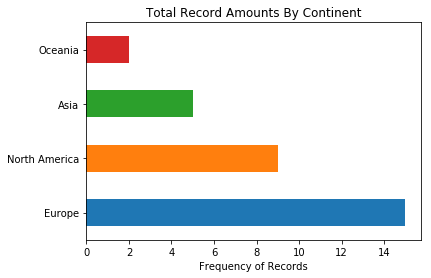

In [11]:
health_count = health["Continent"].value_counts()
health_count.plot(kind = "barh")
plt.title("Total Record Amounts By Continent")
plt.xlabel("Frequency of Records")


Text(0.5,0,'Monthly Hours Worked')

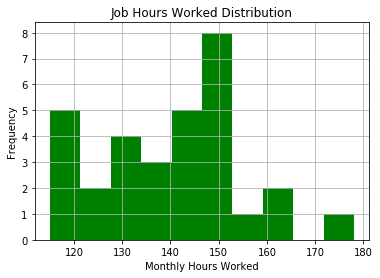

In [12]:
health["Monthly avg. hours worked"].hist(bins = 10, color = "Green")
plt.title("Job Hours Worked Distribution")
plt.ylabel("Frequency")
plt.xlabel("Monthly Hours Worked")

Text(0.5,0,'Cost of Water Bottle (€)')

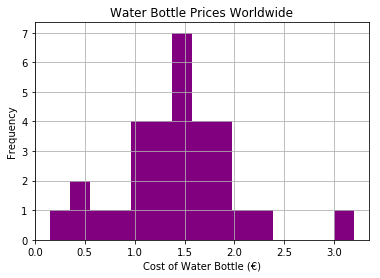

In [13]:
health["Water Bottle Cost(City)"].hist( bins = 15, color = "Purple")
plt.title("Water Bottle Prices Worldwide")
plt.ylabel("Frequency")
plt.xlabel("Cost of Water Bottle (€)")

Text(0.5,0,'Cost of Gym Membership (€)')

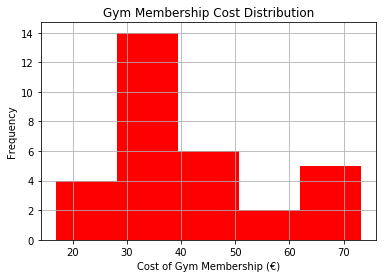

In [14]:
health["Monthly Gym Membership Cost(City)"].hist( bins = 5, color = "Red")
plt.title("Gym Membership Cost Distribution")
plt.ylabel("Frequency")
plt.xlabel("Cost of Gym Membership (€)")

# **Multi-Variable Plots**

Text(0.5,1,'Relationship Between Pollution & Water Bottle Cost')

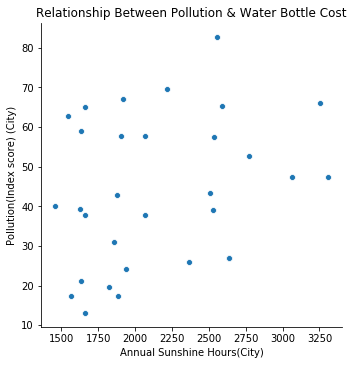

In [15]:
sns.relplot(x ="Annual Sunshine Hours(City)", y = "Pollution(Index score) (City)", data = health)
plt.title("Relationship Between Pollution & Water Bottle Cost")

Text(0.5,1,'Relationship Between Sunshine Hours & Outdoor Activities')

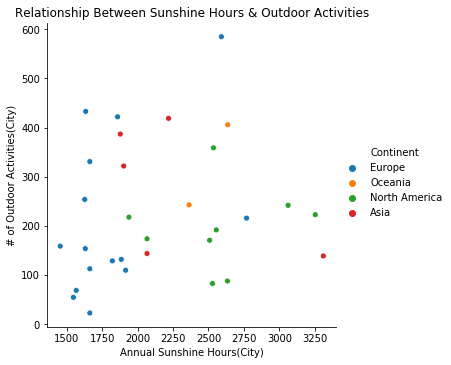

In [16]:
sns.relplot(x = "Annual Sunshine Hours(City)", y = "# of Outdoor Activities(City)", hue = "Continent", data = health)
plt.title("Relationship Between Sunshine Hours & Outdoor Activities")

# **Decision Tree Regression Testing**

In [48]:
#importing missing libraries to do analysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz

In [18]:
x = health[["Monthly Sunshine Hours(City)", "# of Outdoor Activities(City)"]] #Making a dataframe for the independent variables -  slicng the data.
y = health["Water Bottle Cost(City)"]  # Making a list for the dependent variable - slicng the data.

In [19]:
x.head() #checking X data loaded correctly. 

,Monthly Sunshine Hours(City),# of Outdoor Activities(City)
0,154.83,422
1,219.67,406
2,157.00,132
3,151.75,129
4,135.83,154


In [20]:
y.head() #checking Y data loaded correctly. 

0    1.92
1    1.48
2    1.94
3    1.72
4    2.19
Name: Water Bottle Cost(City), dtype: float64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) #splitting the data into 20% testing and 80% training. 

In [22]:
x_train.head()

,Monthly Sunshine Hours(City),# of Outdoor Activities(City)
17,219.50,88
2,157.00,132
25,136.08,433
5,138.50,113
28,211.25,359


In [23]:
y_train.head()

17    1.39
2     1.94
25    1.16
5     1.60
28    1.32
Name: Water Bottle Cost(City), dtype: float64

In [27]:
model = DecisionTreeRegressor(max_depth = 2) #Creating a Decision Tree Regressor with max depth parameter of 3.
model.fit(x_train, y_train) #Fitting our training and testing data into the model.

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
predictions = model.predict(x_test) #Making prediction for the test data.
mean_squared_error(predictions, y_test) #computing the mean squared error.

0.5599337554664724

In [36]:
model2 = DecisionTreeRegressor(max_depth = 10) #Creating a Decision Tree Regressor with max depth parameter of 10.
model2.fit(x_train, y_train) #Fitting our training and testing data into the model.

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
predictions2 = model2.predict(x_test) #Making prediction for the test data.
mean_squared_error(predictions2, y_test) #computing the mean squared error.

0.48210000000000003

In [38]:
model3 = DecisionTreeRegressor(max_depth = 5) #Creating a Decision Tree Regressor with max depth parameter of 5.
model3.fit(x_train, y_train) #Fitting our training and testing data into the model.

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
predictions3 = model3.predict(x_test) #Making prediction for the test data.
mean_squared_error(predictions3, y_test) #computing the mean squared error.

0.45704812698412706

# **K-Nearest Neighbors**

In [53]:
from sklearn.neighbors import KNeighborsRegressor #Improting the K-Nearest Neighbors regressor

In [55]:
knn = KNeighborsRegressor(n_neighbors = 5) ##Creating a KNeighbors Regressor with max depth parameter of 5.
knn.fit(x_train, y_train) #Fitting our training and testing data into the model.

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [56]:
y_test_pred = knn.predict(x_test) #Making prediction for the test data.
mean_squared_error(y_test_pred, y_test) #computing the mean squared error.

0.7254280000000001

In [58]:
knn2 = KNeighborsRegressor(n_neighbors = 10) ##Creating a KNeighbors Regressor with max depth parameter of 10.
knn2.fit(x_train, y_train) #Fitting our training and testing data into the model.

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [63]:
y_test_pred2 = knn2.predict(x_test) #Making prediction for the test data.
mean_squared_error(y_test_pred2, y_test) #computing the mean squared error.

0.7051308571428573

In [62]:
knn3 = KNeighborsRegressor(n_neighbors = 3) ##Creating a KNeighbors Regressor with max depth parameter of 10.
knn3.fit(x_train, y_train) #Fitting our training and testing data into the model.

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [61]:
y_test_pred3 = knn3.predict(x_test) #Making prediction for the test data.
mean_squared_error(y_test_pred3, y_test) #computing the mean squared error.

0.7321015873015874